In [16]:
import os
import io
import requests
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [8]:
base_url = "http://9302f5b020b2.ngrok.io"
endpoint = "/"
model = "yolov3-tiny"

full_url = base_url+endpoint+'?model='+model

In [11]:
def get_response(url, img_file):
  files = {'img_file': img_file}
  response = requests.post(url, files=files)
  status_code = response.status_code

  if status_code==200: msg = "Everything went well!!"
  else: msg = "There was an error"

  print(msg)
  return response

In [12]:
def display_img_from_response(response):
  img_stream = io.BytesIO(response.content)
  img_stream.seek(0)
  file_byte = np.asarray(bytearray(img_stream.read()), dtype=np.uint8)

  img = cv2.imdecode(file_byte, cv2.IMREAD_COLOR)
  plt.imshow(img)

Everything went well!!


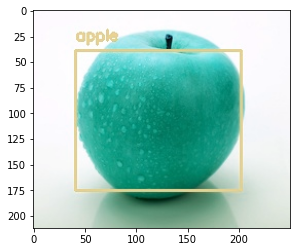

In [17]:
with open("/content/drive/MyDrive/MLEP_specialization/apple.jpg", mode='rb') as f:
  response = get_response(full_url, f)
  display_img_from_response(response)